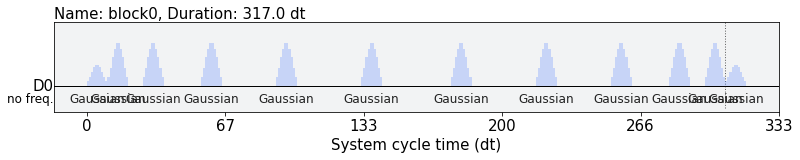

In [1]:
import numpy as np
from qiskit import pulse

d0 = pulse.DriveChannel(0)
x90 = pulse.Gaussian(10, 0.1, 3)
x180 = pulse.Gaussian(10, 0.2, 3)

def udd10_pos(j):
    return np.sin(np.pi*j/(2*10 + 2))**2

with pulse.build() as udd_sched:
    pulse.play(x90, d0)
    with pulse.align_func(duration=300, func=udd10_pos):
        for _ in range(10):
            pulse.play(x180, d0)
    pulse.play(x90, d0)

udd_sched.draw()